<a href="https://colab.research.google.com/github/Dahernandezsilve/HT1MD/blob/main/HT_1_An%C3%A1lisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad del Valle de Guatemala
18 Avenida 11-95 Guatemala      
Departamento de Computación     
Facultad de Ingeniería       
Minería de Datos Sección 10         
Fecha de entrega: 29/01/2024        

Grupo 6 | Integrantes:
- Diego Alexander Hernández Silvestre 21270
- Linda Inés Jimenez Vides 21169
- Daniel Armando Valdez Reyes 21240

## Hoja  de trabajo 1
## Ejercicio 1
Para realizar una exploración inicial del conjunto de datos, se prodeció a realizar un resumen de la información proporcionada en el dataset del archivo "*movies.csv*". A continuación se muestran los resultados: 

In [8]:
import pandas as pd
from typing import *

dataframe: pd.DataFrame = pd.read_csv("movies.csv",  encoding='ISO-8859-1')
rows_to_correct = dataframe[dataframe['actorsCharacter'].astype(str) == dataframe['id'].astype(str)]

# Realiza la corrección de valores
dataframe.loc[rows_to_correct.index, 'director'] = ''
dataframe.loc[rows_to_correct.index, 'actors'] = rows_to_correct['director']
dataframe.loc[rows_to_correct.index, 'actorsPopularity'] = rows_to_correct['actors']
dataframe.loc[rows_to_correct.index, 'actorsCharacter'] = rows_to_correct['actorsPopularity']

rows_to_correct = dataframe[dataframe['actorsPopularity'].astype(str) == 'TRUE']
dataframe.loc[rows_to_correct.index, 'actorsPopularity'] = rows_to_correct['video']
dataframe.loc[rows_to_correct.index, 'video'] = rows_to_correct['actors']

rows_to_correct = dataframe[dataframe['actorsPopularity'].astype(str) == 'FALSE']
dataframe.loc[rows_to_correct.index, 'actorsPopularity'] = rows_to_correct['video']
dataframe.loc[rows_to_correct.index, 'video'] = rows_to_correct['actors']


dataframe['castWomenAmount'] = pd.to_numeric(dataframe['castWomenAmount'], errors='coerce')
dataframe['castMenAmount'] = pd.to_numeric(dataframe['castMenAmount'], errors='coerce')

dataframeTo = dataframe.drop('id', axis=1)

dataframeTo.describe()

,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9963.000000,9838.000000
mean,1.855163e+07,5.673793e+07,100.268100,51.393907,6.483490,1342.381800,2.596500,3.171400,1.751000,2147.666600,7004.157784,16557.193434
std,3.662669e+07,1.495854e+08,27.777829,216.729552,0.984274,2564.196637,1.154565,2.539738,3.012093,37200.075802,67239.619658,100455.960117
min,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,90.000000,14.577750,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000,3.000000,7.000000
50%,5.000000e+05,1.631245e+05,100.000000,21.905500,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000,6.000000,12.000000
75%,2.000000e+07,4.479661e+07,113.000000,40.654000,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000,10.000000,20.000000
max,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000,922162.000000,922017.000000


In [9]:
dataframe.columns

Index(['id', 'budget', 'genres', 'homePage', 'productionCompany',
       'productionCompanyCountry', 'productionCountry', 'revenue', 'runtime',
       'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter',
       'originalTitle', 'title', 'originalLanguage', 'popularity',
       'releaseDate', 'voteAvg', 'voteCount', 'genresAmount',
       'productionCoAmount', 'productionCountriesAmount', 'actorsAmount',
       'castWomenAmount', 'castMenAmount'],
      dtype='object')

In [10]:
# Dividir los valores y expandirlos en nuevas filas
split_values = dataframe['actorsPopularity'].str.split('|', expand=True).stack()

# Crear un nuevo DataFrame con los valores divididos
new_dataframe = split_values.reset_index(level=1, drop=True).to_frame('actorsPopularity')

# Convertir la columna a números
new_dataframe['actorsPopularity'] = new_dataframe['actorsPopularity'].astype(float)

# Ejercicio 2

Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa
continua, cuantitativa discreta)

- Id: Cualitativa Ordinal
- popularity: Cuantitativa Discreta
- budget: Cuantitativa Discreta
- revenue: Cuantitativa Discreta
- original_title: Cualitativa Nominal
- originalLanguage: Cualitativa Nominal
- title: Cualitativa Nominal
- homePage: Cualitativa Nominal
- video: Cualitativa Nominal
- director: Cualitativa Nominal
- runtime: Cuantitativa Continua
- genres: Cualitativa Nominal
- genresAmount: Cuantitativa Discreta
- productionCompany: Cualitativa Nominal
- productionCoAmount: Cuantitativa Discreta
- productionCompanyCountry: Cualitativa Nominal
- productionCountry: Cualitativa Nominal
- productionCountriesAmount: Cuantitativa Contable
- releaseDate: Cualitativa Ordinal
- voteCount: Cuantitativa Contable
- voteAvg: Cuantitativo Contable
- actors: Cualitativo Nominal
- actorsPopularity: Cuantitativa Discreta
- actorsCharacter: Cualitativa Nominal
- actorsAmount: Cuantitativa Discreta
- castWomenAmount: Cuantitativa Discreta
- castMenAmount: Cuantitativa Discreta

# Ejercicio 3

In [11]:
# Se hace una funcion que haga pruebas para las variables cuantitativas
from scipy.stats import kstest
RESET = "\033[0m"
RED = "\033[91m"
GREEN = "\033[92m"
YELLOW = "\033[93m"
CYAN = "\033[96m"


def test_normal(colum, data=dataframe):
    # Supongamos que 'data' es tu DataFrame y 'column' es la columna que quieres verificar
    
    # Realizar la prueba de Kolmogorov-Smirnov
    stat, p_value = kstest(data[colum], 'norm')
    print('\033[96m' + 'Para la variable', colum, '\033[0m')

    # Imprimir los resultados
    print(f'Estadística de prueba: {stat}, Valor p: {p_value}')

    # Interpretar el resultado
    alpha = 0.05
    if p_value > alpha:
        print('\033[92m' + 'No podemos rechazar la hipótesis nula: la variable parece seguir una distribución normal.' + '\033[0m')
        return True
    else:
        print('\033[91m' + 'Rechazamos la hipótesis nula: la variable no sigue una distribución normal.' + '\033[0m')
        return False





In [12]:
quantitative_variables = ['popularity', 'budget', 'revenue', 'runtime', 'genresAmount', 'productionCoAmount', 'productionCountriesAmount', 'voteCount', 'voteAvg', 'actorsAmount', 'castWomenAmount', 'castMenAmount']
accepted_variables = []
reject_variables = []

for variable in quantitative_variables:
    is_aproved = test_normal(variable)
    if is_aproved:
        accepted_variables.append(variable)
    else:
        reject_variables.append(variable)


is_aproved = test_normal('actorsPopularity', new_dataframe)
if is_aproved:
    accepted_variables.append('actorsPopularity')
else:
    reject_variables.append('actorsPopularity')
print('\n')



Para la variable popularity 
Estadística de prueba: 0.9999896868025426, Valor p: 0.0
Rechazamos la hipótesis nula: la variable no sigue una distribución normal.
Para la variable budget 
Estadística de prueba: 0.5188997133484281, Valor p: 0.0
Rechazamos la hipótesis nula: la variable no sigue una distribución normal.
Para la variable revenue 
Estadística de prueba: 0.5221683287581669, Valor p: 0.0
Rechazamos la hipótesis nula: la variable no sigue una distribución normal.
Para la variable runtime 
Estadística de prueba: 0.9889683287581669, Valor p: 0.0
Rechazamos la hipótesis nula: la variable no sigue una distribución normal.
Para la variable genresAmount 
Estadística de prueba: 0.8395447460685429, Valor p: 0.0
Rechazamos la hipótesis nula: la variable no sigue una distribución normal.
Para la variable productionCoAmount 
Estadística de prueba: 0.8372447460685429, Valor p: 0.0
Rechazamos la hipótesis nula: la variable no sigue una distribución normal.
Para la variable productionCountri

In [13]:
print(CYAN, 'Variables con distribucion normal', RESET)
for i in accepted_variables:
    print(GREEN,i,RESET)

print('\n')

print(CYAN, 'Variables sin distribucion normal', RESET)
for i in reject_variables:
    print(RED,i,RESET)

 Variables con distribucion normal 


 Variables sin distribucion normal 
 popularity 
 budget 
 revenue 
 runtime 
 genresAmount 
 productionCoAmount 
 productionCountriesAmount 
 voteCount 
 voteAvg 
 actorsAmount 
 castWomenAmount 
 castMenAmount 
 actorsPopularity 


In [14]:
qualitative_variables = ['originalTitle', 'originalLanguage', 'title', 'homePage', 'video',
                           'director', 'genres', 'productionCompany', 'productionCompanyCountry',
                           'productionCountry', 'actors', 'actorsCharacter']

tables_dic = dict()

def frecuency_table(colum, data= dataframe):
    # Obtener la tabla de frecuencias para la variable 'genres'

    split_genres = data[colum].dropna().astype(str).str.split('|', expand=True).stack()
    split_genres = split_genres[split_genres != ' ']
    split_genres = split_genres[split_genres != '']
    frecuencias = split_genres.value_counts()
    frecuencia_relativa = frecuencias / len(split_genres)
    frecuencia_relativa_acum = frecuencia_relativa.cumsum()


    # Convertir la serie resultante en un DataFrame para mejor presentación
    tabla_frecuencias = pd.DataFrame({
        colum: frecuencias.index,
        'Frecuencia': frecuencias.values,
        'Frecuencia Relativa': frecuencia_relativa.values,
        'Frecuencia Relativa Acumulada': frecuencia_relativa_acum.values
    })

    tables_dic[colum] = tabla_frecuencias

    print(CYAN, 'Tabla de frecuencias para la variable', colum, RESET)
    print(tabla_frecuencias)

for variable in qualitative_variables:
    frecuency_table(variable)



 Tabla de frecuencias para la variable originalTitle 
                                          originalTitle  Frecuencia  \
0                                             Pinocchio           4   
1                                    Great Expectations           3   
2                                           Escape Room           3   
3                                           The Courier           3   
4                                   Alice in Wonderland           3   
...                                                 ...         ...   
9755                                       Into the Sun           1   
9756  The Land Before Time X: The Great Longneck Mig...           1   
9757  The Land Before Time XI: Invasion of the Tinys...           1   
9758                              Dug's Special Mission           1   
9759                                             Row 19           1   

      Frecuencia Relativa  Frecuencia Relativa Acumulada  
0                  0.0004         

# Ejercicio 4
#### Responda las siguientes preguntas:

4.1. ¿Cuáles son las 10 películas que contaron con más presupuesto?

En la siguiente tabla se puede apreciar ordenadas las 10 películas de mayor a menor, quienes más presupuesto tuvieron, siendo la primera de ellas Pirates of the Caribbean: On Stranger Tides con $380,000,000.00, seguida por Avengers: Age of Ultron y Avengers: Endgame en el respectivo orden. A continuación se presentan el resto de películas con mayores presupuestos:

          id                                        title     budget
716     1865  Pirates of the Caribbean: On Stranger Tides  380000000
4710   99861                      Avengers: Age of Ultron  365000000
5952  299534                            Avengers: Endgame  356000000
4953  141052                               Justice League  300000000
5953  299536                       Avengers: Infinity War  300000000
163      285     Pirates of the Caribbean: At World's End  300000000
607     1452                             Superman Returns  270000000
7134  420818                                The Lion King  260000000
3791   38757                                      Tangled  260000000
280      559                                 Spider-Man 3  258000000


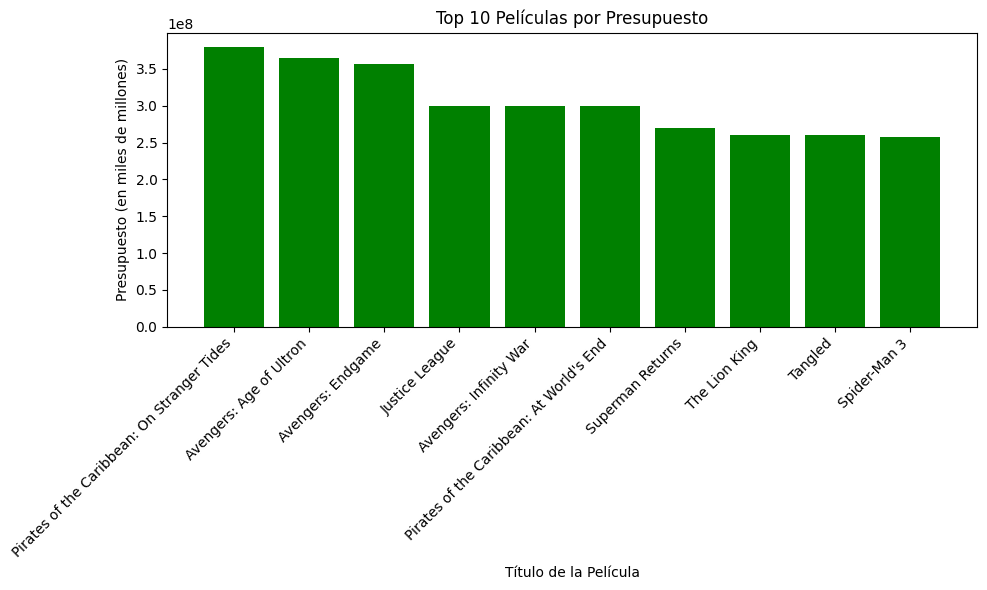

In [15]:
from tabulate import tabulate
import matplotlib.pyplot as plt

budget_data = dataframe.sort_values(by='budget', ascending=False)

bgd = budget_data.head(10)[['id', 'title', 'budget']]
print(bgd)
ingresosOrdenado = tabulate(bgd[['id', 'title', 'budget']], headers='keys', tablefmt='pretty', showindex=False)

ids = bgd['id']
titulos = bgd['title']
budget = bgd['budget']

plt.figure(figsize=(10, 6))
plt.bar(titulos, budget, color='green')

plt.xlabel('Título de la Película')
plt.ylabel('Presupuesto (en miles de millones)')
plt.title('Top 10 Películas por Presupuesto')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


4.2. ¿Cuáles son las 10 películas que más ingresos tuvieron?

En la siguiente tabla y gráfica se puede apreciar ordenadas las 10 películas de mayor a menor, quienes más ingresos tuvieron, siendo la primera de ellas Avatar con $2,847,246,000.00, seguida por Avengers Endgame y Titanic en el respectivo orden. A continuación se presentan el resto de películas con mayores ingresos:

+--------+------------------------------+--------------+
|   id   |            title             |   revenue    |
+--------+------------------------------+--------------+
| 19995  |            Avatar            | 2847246203.0 |
| 299534 |      Avengers: Endgame       | 2797800564.0 |
|  597   |           Titanic            | 2187463944.0 |
| 140607 | Star Wars: The Force Awakens | 2068223624.0 |
| 299536 |    Avengers: Infinity War    | 2046239637.0 |
| 135397 |        Jurassic World        | 1671713208.0 |
| 420818 |        The Lion King         | 1667635327.0 |
| 634649 |   Spider-Man: No Way Home    | 1631853496.0 |
| 24428  |         The Avengers         | 1518815515.0 |
| 168259 |          Furious 7           | 1515047671.0 |
+--------+------------------------------+--------------+


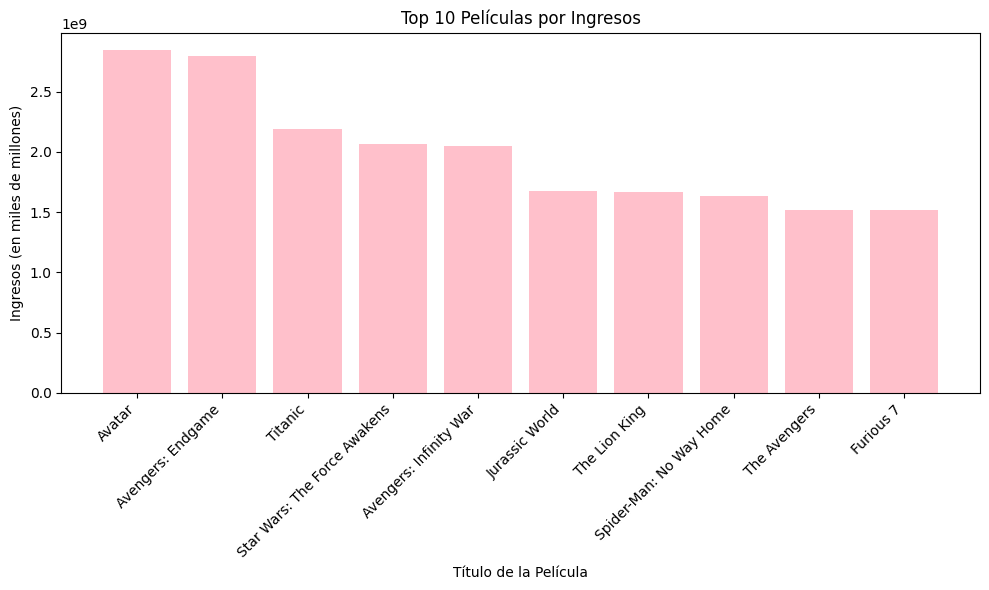

In [16]:
#4.2
import matplotlib.pyplot as plt
from tabulate import tabulate

mayorIngreso = dataframe.sort_values(by='revenue', ascending=False).head(10)
ingresosOrdenado1 = mayorIngreso[['id', 'title', 'revenue']]
ingresosOrdenado = tabulate(mayorIngreso[['id', 'title', 'revenue']], headers='keys', tablefmt='pretty', showindex=False)
print(ingresosOrdenado)

ids = ingresosOrdenado1['id'].head(10)
titulos = ingresosOrdenado1['title'].head(10)
ingresos = ingresosOrdenado1['revenue'].head(10)

plt.figure(figsize=(10, 6))
plt.bar(titulos, ingresos, color='pink')

plt.xlabel('Título de la Película')
plt.ylabel('Ingresos (en miles de millones)')
plt.title('Top 10 Películas por Ingresos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4.3.¿Cuál es la película que más votos tuvo?

Al identificar el índice de la película con más votos se encontró que la misma es "Inception". A continuación se muestra una descripción general de la película: 

In [17]:
#Inciso 4.3.
indexMaxVotes = dataframe['voteCount'].idxmax()
movieMaxVotes = dataframe.loc[indexMaxVotes]
print(movieMaxVotes)

id                                                                       27205
budget                                                               160000000
genres                                        Action|Science Fiction|Adventure
homePage                                 http://inceptionmovie.warnerbros.com/
productionCompany             Legendary Pictures|Syncopy|Warner Bros. Pictures
productionCompanyCountry                                              US|GB|US
productionCountry                      United Kingdom|United States of America
revenue                                                            825532764.0
runtime                                                                    148
video                                                                    False
director                                                     Christopher Nolan
actors                       Leonardo DiCaprio|Joseph Gordon-Levitt|Ken Wat...
actorsPopularity             32.621|15.377|6.935|43.

4.4.¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?

De la misma manera, al identificar el índice de la película con menos votos (peor película) se encontró que la misma es "La Mera Reyna del Sur". A continuación se muestra una descripción general de la película: 

In [18]:
#Inciso 4.4.
indexMinVotes = dataframe["voteCount"].idxmin()
worstMovie = dataframe.loc[indexMinVotes]
print(worstMovie)

id                                                                      113205
budget                                                                       0
genres                                                            Action|Crime
homePage                                                                   NaN
productionCompany                                    Javier Ulloa/Luis Estrada
productionCompanyCountry                                                   NaN
productionCountry                                                       Mexico
revenue                                                                    0.0
runtime                                                                     88
video                                                                    False
director                                                          Luis Estrada
actors                       Rafael Goyri|Ruben Gutierrez|Tania Mendoza|Toï...
actorsPopularity             4.941|0.6|0.6|3.043|0.6

4.5. ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas? Haga un gráfico de barras

Ya que es una cuenta de casi 100 años es dificil decir cuantas peliculas fueron cada año, pero se puede apreciar que el mínimo de plículas en un año fue 1 y el máximo fue de 816. En este caso el año que más películas hubo fue 2021 con 816. También se puede apreciar el gráfico de barras a continuación:

+------+-----------------------+
| Año  | Cantidad de películas |
+------+-----------------------+
| 2021 |          816          |
| 2018 |          629          |
| 2017 |          618          |
| 2019 |          612          |
| 2016 |          557          |
| 2020 |          533          |
| 2015 |          450          |
| 2014 |          432          |
| 2013 |          412          |
| 2011 |          361          |
| 2009 |          342          |
| 2012 |          328          |
| 2010 |          307          |
| 2008 |          282          |
| 2006 |          272          |
| 2007 |          266          |
| 2005 |          245          |
| 2004 |          229          |
| 2003 |          199          |
| 2002 |          185          |
| 2001 |          176          |
| 2000 |          132          |
| 1999 |          97           |
| 1998 |          92           |
| 1997 |          84           |
| 1993 |          83           |
| 1995 |          79           |
| 1996 |  

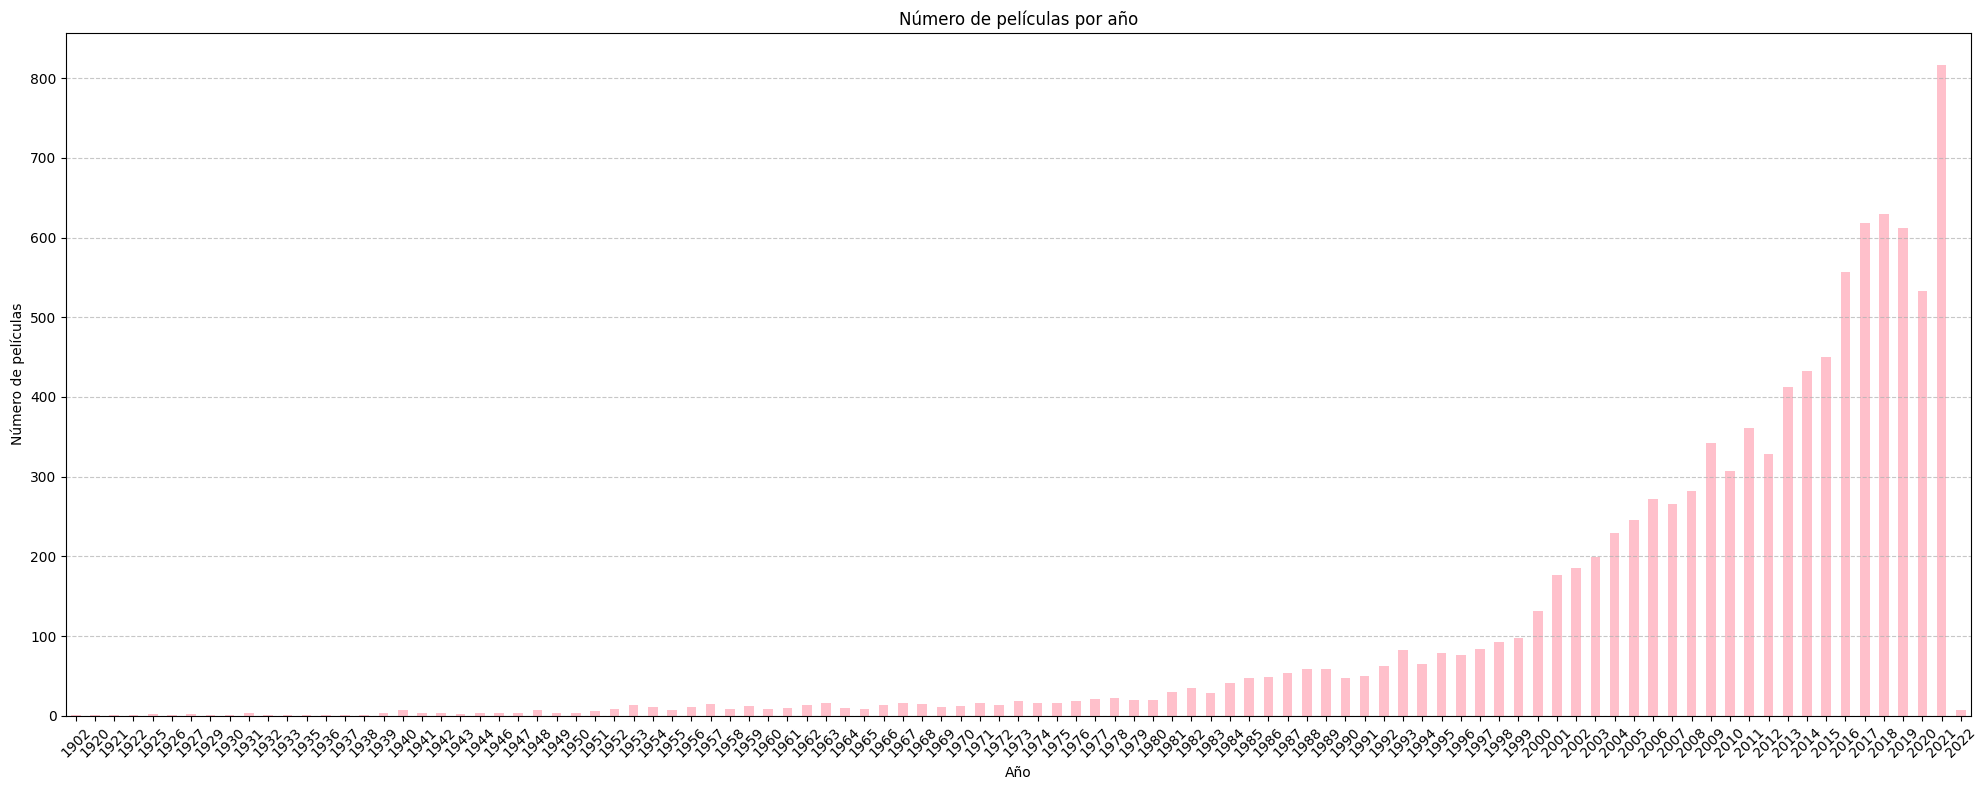

In [19]:
#4.5
import matplotlib.pyplot as plt
from tabulate import tabulate

dataframe['ano'] = pd.to_datetime(dataframe['releaseDate']).dt.year

peliculasAno = dataframe['ano'].value_counts().sort_index()

anoMasPeliculas = peliculasAno.idxmax()
cantidadPeliculas = peliculasAno.max()

tablaPeliculas = pd.DataFrame({'Año': peliculasAno.index, 'Cantidad de películas': peliculasAno.values})
peliculasOrdenadas = tablaPeliculas.sort_values(by='Cantidad de películas', ascending=False)
peliculasOrdenadas2 = tabulate(peliculasOrdenadas[['Año', 'Cantidad de películas']], headers='keys', tablefmt='pretty', showindex=False)

print(peliculasOrdenadas2)

# Grafico
plt.figure(figsize=(20, 8))
peliculasAno.plot(kind='bar', color='pink')
plt.title('Número de películas por año')
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

4.6.¿Cuál es el género principal de las 20 películas más recientes?

Para identificiar el género principal de las 20 películas más recientes se decidió filtrar primero la cantidad de géneros que tienen las películas para que solo quede uno predominante y de esta manera generar un recuento. Luego se filtraron los resultados para obtener un listado con las 20 películas más recientes y como resultado, se determinó que el principal género de la actualidad es "Comedy". A continuación se muestra el resultado:

In [20]:
#Inciso 4.6
firstgenre = dataframe
firstgenre["genres"] = dataframe["genres"].str.split("|").str[0]
releaseDateSortD = firstgenre.sort_values(by="releaseDate", ascending=False)
last20Movies = releaseDateSortD.head(20)
predominantGender = last20Movies["genres"].value_counts().idxmax()
print(predominantGender)

Comedy


¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico

De manera similar, se realizó un filtrado de los datos para obtener los géneros predominantes de cada película y se generó un histograma que muestra la distribución de los géneros respecto a la cantidad de películas por cada uno. Del mismo, se puede destacar que el género más producido es "Drama" por arriba de 1750 películas. Los siguientes géneros más vistos son "Comedy" y "Action" con un conteo aproximado de 1500 películas cada uno respectivamente. 

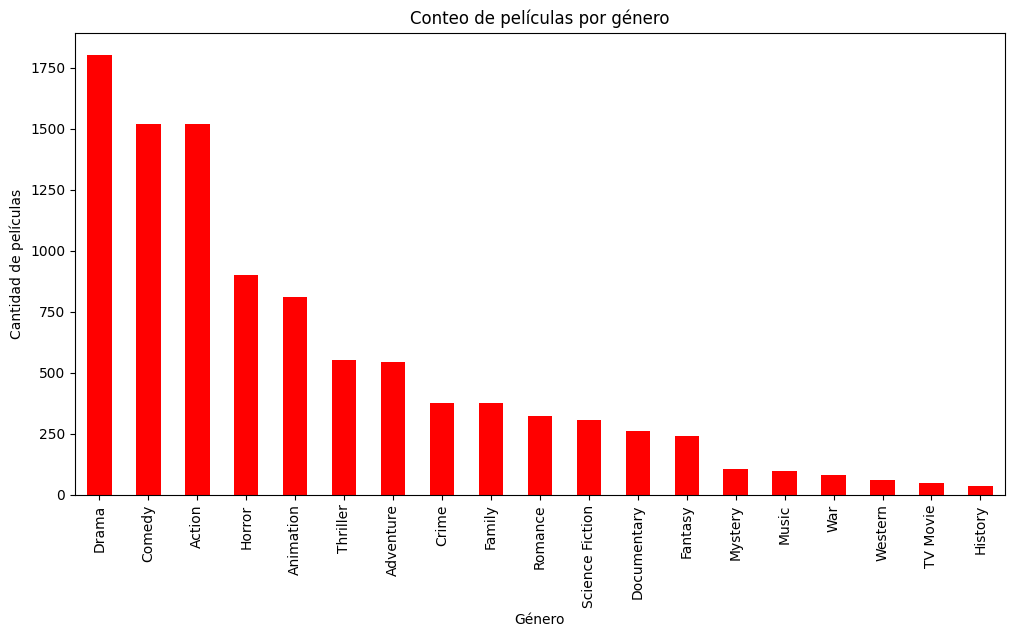

In [21]:
import matplotlib.pyplot as plt

#Filtro de datos
firstgenre = dataframe
firstgenre["genres"] = dataframe["genres"].str.split("|").str[0]
countGenders = dataframe["genres"].value_counts()

#Gráfico
plt.figure(figsize=(12,6))
countGenders.plot(kind="bar", color="red")
plt.title("Conteo de películas por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de películas")
plt.show()

4.7. ¿Las películas de qué genero principal obtuvieron mayores ganancias?

Para esta pregunta lo que se realizó fue el promedio de las ganancias por cada género principal de las películas. En este caso se hizo la resta de ingresos menos presupuesto para así obtener las ganancias, y así despues realizar el promedio de todas estas ganancias en base a su género. En este caso podemos ver que el género principal de películas con mayor promedio de ganancia fue el género de aventura con un promedio de ganancia de $110,498,311.03, le siguen los géneros de acción, fantasía, ciencia ficción y familia en el respectivo orden. En la tabla y gráfica a continuación se puede visualizar mejor estos resultados:

+----+------------------+--------------------+
|    | Genero Principal |      Ganancia      |
+----+------------------+--------------------+
| 0  |    Adventure     | 110498311.03321034 |
| 1  |      Action      | 60787999.93280632  |
| 2  |     Fantasy      | 60545047.39004149  |
| 3  | Science Fiction  |     53719811.0     |
| 4  |      Family      | 49666649.005347595 |
| 5  |       War        |    40501677.75     |
| 6  |    Animation     | 39775727.05918619  |
| 7  |      Comedy      |  32737427.2481896  |
| 8  |     History      | 30321753.62857143  |
| 9  |     Mystery      | 29871281.798076924 |
| 10 |      Music       | 26514670.58163265  |
| 11 |      Drama       | 24594754.58236273  |
| 12 |     Romance      | 21615019.59190031  |
| 13 |      Crime       | 20962410.82180851  |
| 14 |      Horror      | 19355122.68479467  |
| 15 |     Thriller     | 18355058.721518986 |
| 16 |     Western      | 14446753.147540983 |
| 17 |   Documentary    | 1103506.2123552123 |
| 18 |     TV

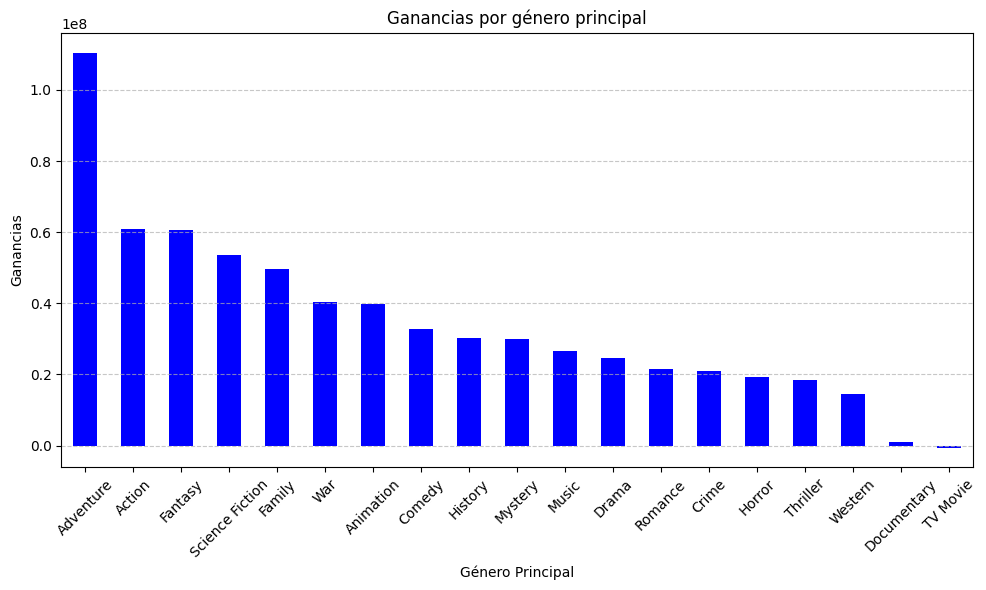

In [22]:
#4.7
import matplotlib.pyplot as plt
from tabulate import tabulate

dataframe['Ganancia'] = dataframe['revenue'] - dataframe['budget']
dataframe['Genero Principal'] = dataframe['genres'].str.split('|').str[0]


gananciasGenero = dataframe.groupby('Genero Principal')['Ganancia'].mean()

generoMasGanancias = gananciasGenero.idxmax()
max_ganancias = gananciasGenero.max()

ganancias = pd.DataFrame(gananciasGenero)

gananciasOrdenadas = ganancias.sort_values(by='Ganancia', ascending=False)
gananciasOrdenadas2 = gananciasOrdenadas.reset_index() 
print(tabulate(gananciasOrdenadas2, headers='keys', tablefmt='pretty'))

print(f"\nEl género con mayores ganancias es {generoMasGanancias} con {max_ganancias} ganancias.")

plt.figure(figsize=(10, 6))
gananciasGenero.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Ganancias por género principal')
plt.xlabel('Género Principal')
plt.ylabel('Ganancias')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

4.8.¿La cantidad de actores influye en los ingresos de las películas?

Para determinar si la cantidad de actores influye en los ingresos de las películas, se procedió a generar un gráfico de dispersión y el cálculo del valor de correlación entre las columnas "actorsAmount" y "revenue" para ver qué tanto se relacionan una variable con la otra. Al observar el gráfico se puede determinar que son variables que no tienen relación absoluta y de acuerdo con el valor de correlación resultante de -0.0195548 se puede decir que se presenta una correlación cercana a 0, lo que implica que la relación lineal entre la cantidad de actores y los ingresos es débil o prácticamente inexistente. De la misma manera el R² cercano a 0 nos indica que existe una baja correlación entre la cantida de actores y los ingresos. 

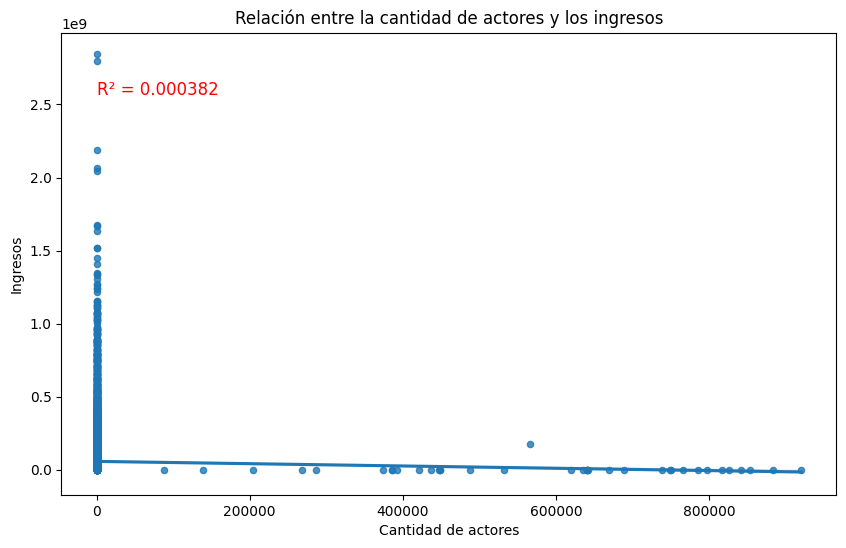

Coeficiente de determinación (R^2):
0.00038239333862918234
Valor de correlación:
-0.019554880174247613


In [24]:
#Inciso 4.8.
import matplotlib.pyplot as plt
import seaborn as sns

#Gráfico de dispersión
plt.figure(figsize=(10,6))
sns.regplot(x='actorsAmount', y='revenue', data=dataframe, scatter_kws={'s': 20})
plt.title("Relación entre la cantidad de actores y los ingresos")
plt.xlabel("Cantidad de actores")
plt.ylabel("Ingresos")
#Valor de correlación
correlation = dataframe['actorsAmount'].corr(dataframe['revenue'])
rSquared = correlation**2
plt.text(2, 0.9 * dataframe['revenue'].max(), f'R² = {rSquared:.6f}', fontsize=12, color='red')
plt.show()


print("Coeficiente de determinación (R^2):")
print(rSquared)
print("Valor de correlación:")
print(correlation)

4.9 ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las peliculas?

Según los valores especificos de correlación que se identificaron en el siguiente analisis no se encontro relación alguna entre la cantidad cantidad de hombres y mujeres en la popularidad y los ingresos de las peliculas. 

In [ ]:
mans_ = dataframe[['castMenAmount', 'revenue', 'popularity']]
womens_ = dataframe[['castWomenAmount', 'revenue', 'popularity']]

print("Dependiendo del numero de hombres en el reparto, la correlacion es:")
mans_corr = mans_.corr()
print(mans_corr)

#En el numero de ingresos
print("El valor especifico de correlacion para los ingresos es:", mans_corr.loc['revenue','castMenAmount'])

#En el numero de popularidad
print("El valor especifico de correlacion para la popularidad es:", mans_corr.loc['popularity','castMenAmount'])

print("Dependiendo del numero de mujeres en el reparto, la correlacion es:")
womens_corr = womens_.corr()
print(womens_corr)

#En el numero de ingresos
print("El valor especifico de correlacion para los ingresos es:", womens_corr.loc['revenue','castWomenAmount'])

#En el numero de popularidad
print("El valor especifico de correlacion para la popularidad es:", womens_corr.loc['popularity','castWomenAmount'])



Dependiendo del numero de hombres en el reparto, la correlacion es:
               castMenAmount   revenue  popularity
castMenAmount       1.000000 -0.060143    0.002779
revenue            -0.060143  1.000000    0.162546
popularity          0.002779  0.162546    1.000000
El valor especifico de correlacion para los ingresos es: -0.060143096308243105
El valor especifico de correlacion para la popularidad es: 0.0027785994912281516
Dependiendo del numero de mujeres en el reparto, la correlacion es:
                 castWomenAmount   revenue  popularity
castWomenAmount         1.000000 -0.037397   -0.001778
revenue                -0.037397  1.000000    0.162546
popularity             -0.001778  0.162546    1.000000
El valor especifico de correlacion para los ingresos es: -0.037396591172953665
El valor especifico de correlacion para la popularidad es: -0.0017782819628272206


¿Se han hecho películas con más actores en los últimos años?

También se decidió comprobar si en los últimos años, se han producido peliculas con mayor cantidad de actores. Para verificar esto, se realizó una gráfica de líneas que relaciona el "releaseYear" y el "actorsAmount" . De esto se puede observar que se presenta una variabilidad significativa a partir del año 2000 hasta la actualidad, alcanzando un pico máximo con más de 7500 actores y oscilando entre 0 a 5000 actores aproximadamente. Antes de los 2000, la cantidad de actores es significativamente menor.  

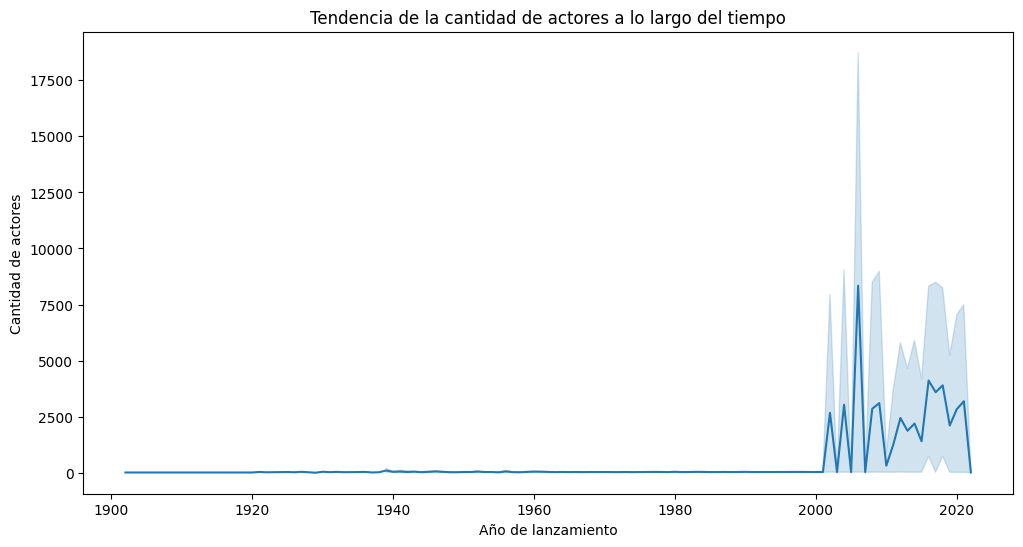

In [ ]:
dataframe['releaseYear'] = pd.to_datetime(dataframe['releaseDate']).dt.year
plt.figure(figsize=(12,6))
sns.lineplot(x="releaseYear", y="actorsAmount", data=dataframe)
plt.title("Tendencia de la cantidad de actores a lo largo del tiempo")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de actores")
plt.show()

4.10.¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

También se buscó identificar a los directores que hicieron las 20 películas mejor calificadas. Para ello, se utilizó la columna "voteAvg" para ordenar las 20 películas de forma descendente, se removieron los resultados que no tenian directores definidos (nan) y se logró identificar que hay 7 películas con una valoración promedio de 10. Se pueden mencionar a los directores como Laurent Bouzereau, Christin Baker y Rebecca Sugar como algunos que obtuvieron peliculas con valoración promedio de 10. 

In [ ]:
# Inciso 4.10
from tabulate import tabulate
sortVoteAvg = dataframe.sort_values(by="voteAvg", ascending=False)
#print(sortVoteAvg[["director", "title", "voteAvg"]])
sortVoteAvg = sortVoteAvg.dropna(subset="director")
sortVoteAvg = sortVoteAvg.head(20)
table = tabulate(sortVoteAvg[["director", "title", "voteAvg"]], headers='keys', tablefmt='pretty', showindex=False)
print(table)

+----------------------------------------+--------------------------------------------------------+---------+
|                director                |                         title                          | voteAvg |
+----------------------------------------+--------------------------------------------------------+---------+
|           Laurent Bouzereau            |    Spirit of Vengeance: The Making of 'Ghost Rider'    |  10.0   |
|             Christin Baker             |                 Christmas at the Ranch                 |  10.0   |
|                                        |        El Chavo Del Ocho: Lo Mejor De Don Ramon        |  10.0   |
|             Rebecca Sugar              |     Steven Universe: The Movie: Behind the Curtain     |  10.0   |
|          Miguel Angel Zavala           |                Los Vengadores Chiflados                |  10.0   |
|              Thomas Coven              |                Hot Naked Sex & the City                |  10.0   |
|         

4.11 ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión. 

Según lo que es posible identificar en base al diagrama de dispersión se puede observar que tiene una correlación más o menos positiva. Esto se complementa con el valor especifíco de la correlación el cual es de 0.8 aproximadamente lo cual comprueba la correlación. 

          revenue    budget
revenue  1.000000  0.757454
budget   0.757454  1.000000
El valor específico de correlación para los ingresos es: 0.7574540424956043


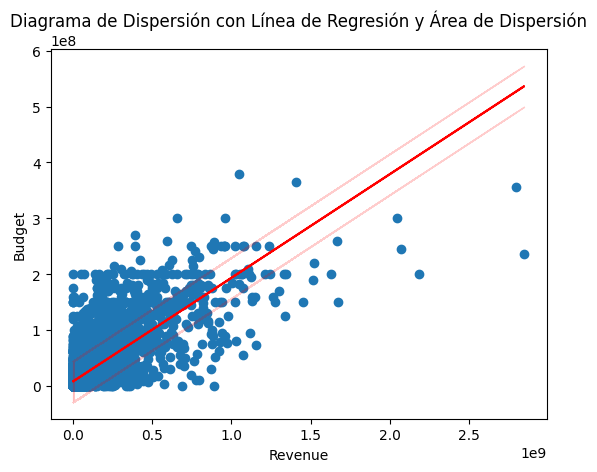

In [ ]:
import numpy as np

# Supongamos que 'dataframe' es tu DataFrame
revenue_vs_budget = dataframe[['revenue', 'budget']]
revenue_vs_budget = revenue_vs_budget.dropna()

# Calcular la correlación
revenue_corr_budget = revenue_vs_budget.corr()
print(revenue_corr_budget)

# Imprimir el valor específico de correlación para los ingresos
print("El valor específico de correlación para los ingresos es:", revenue_corr_budget.loc['revenue', 'budget'])

# Crear un diagrama de dispersión con línea de regresión y área sombreada
plt.scatter(revenue_vs_budget['revenue'], revenue_vs_budget['budget'])

# Ajustar una línea de regresión lineal
m, b = np.polyfit(revenue_vs_budget['revenue'], revenue_vs_budget['budget'], 1)

# Trazar la línea de regresión
plt.plot(revenue_vs_budget['revenue'], m * revenue_vs_budget['revenue'] + b, color='red')

# Calcular y trazar el área sombreada alrededor de la línea de regresión
plt.fill_between(revenue_vs_budget['revenue'], m * revenue_vs_budget['revenue'] + b - np.std(revenue_vs_budget['budget']),
                 m * revenue_vs_budget['revenue'] + b + np.std(revenue_vs_budget['budget']), color='red', alpha=0.2)

# Etiquetas y título
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.title('Diagrama de Dispersión con Línea de Regresión y Área de Dispersión')

# Mostrar el gráfico
plt.show()

4.12. ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

En esta ocasión se realizó un gráfico de dispersión para saber si el promedio de ingresos tenía que ver o tenía alguna relación con los meses en el año. Como se puede apreciar en el gráfico junto con la regresión lineal y cálculo de R^2 que estas dos variables no tienen ninguna relación, ya que el coeficiente de determinación es 0.000327, prácticamente 0, donde entre más relación se tenga, debería estar cercano a 1.

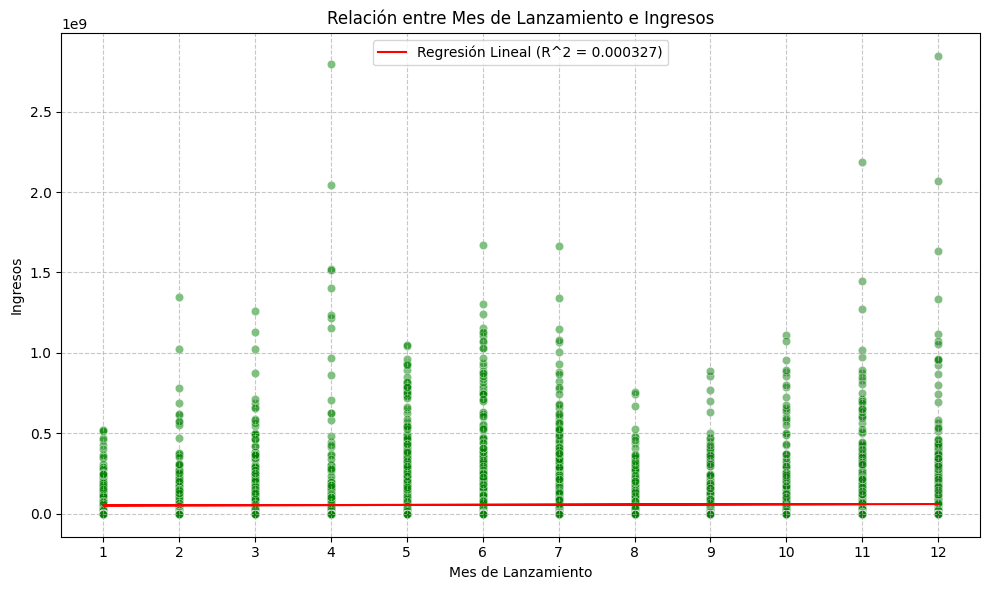

In [ ]:
#4.12
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

dataframe['mes'] = pd.to_datetime(dataframe['releaseDate']).dt.month

ingresosMes = dataframe.groupby('mes')['revenue'].mean()

# Dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='mes', y='revenue', color='green', alpha=0.5)

# Ajustar una regresión lineal
modelo = LinearRegression()
modelo.fit(dataframe[['mes']], dataframe['revenue'])
predicciones = modelo.predict(dataframe[['mes']])

# Calcular R^2
r_cuadrado = r2_score(dataframe['revenue'], predicciones)

# Graficar la línea de regresión
plt.plot(dataframe['mes'], predicciones, color='red', label=f'Regresión Lineal (R^2 = {r_cuadrado:.6f})')
plt.title('Relación entre Mes de Lanzamiento e Ingresos')
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Ingresos')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

4.13.¿En qué meses se han visto los lanzamientos con mejores ingresos? 

Para determinar los meses en los que se han visto los lanzamientos con mejores ingresos se agrupó la cantidad de ingresos por cada mes y se calculó la media de ingresos. De los resultados se puede observar que el mes con mayor cantidad de ingresos promedio es junio. Es interesante notar que los meses cercanos a junio como mayo y julio le siguen entre los meses con mayor cantidad de ingresos. Finalmente se destaca que al finalizar el año, en noviembre y diciembre, se observa un incremento de ingresos respecto a lanzamientos de películas.  

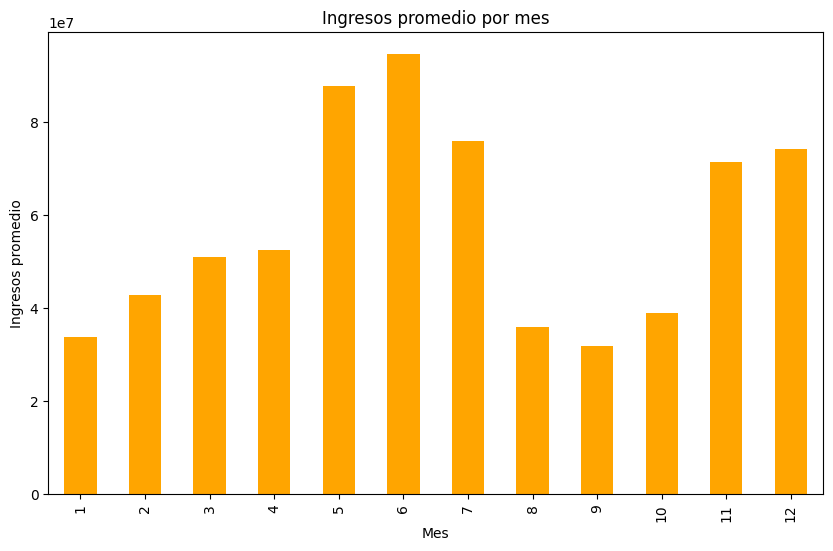

In [ ]:
#Convertimos a formato fecha
dataframe["releaseDate"] = pd.to_datetime(dataframe["releaseDate"], errors="coerce")

#Extraemos el mes
dataframe["releaseMonth"] = dataframe["releaseDate"].dt.month

avgPerMonth = dataframe.groupby('releaseMonth')['revenue'].mean()

plt.figure(figsize=(10,6))
avgPerMonth.plot(kind="bar", color="orange")
plt.title("Ingresos promedio por mes")
plt.xlabel("Mes")
plt.ylabel("Ingresos promedio")
plt.show()

¿Cuantas películas, en promedio, se han lanzado por mes?

Además, se procedió a realizar un conteo de la cantidad de películas lanzadas por mes a través de la agrupación de datos. Como resultado se obtuvo que la cantidad de peliculas que se han lanzado en promedio por mes, es de 833.33. A continuación se muestra el resultado: 

In [ ]:
#Convertir a fecha
dataframe["releaseDate"] = pd.to_datetime(dataframe["releaseDate"], errors="coerce")
#Extraer mes
dataframe["releaseMonth"] = dataframe["releaseDate"].dt.month
#Calculo de promedio
countMoviesMonth = dataframe.groupby("releaseMonth").size()
avgMoviesPerMonth = countMoviesMonth.mean()
print("Promedio de películas lanzadas por mes:")
print(avgMoviesPerMonth)

Promedio de películas lanzadas por mes:
833.3333333333334


4.14 ¿Cómo se correlacionan las calificaciones con el éxito comercial?

Según lo que es posible ver en la gráfica y con el valor especifíco de la correlación se concluye que no existe una relación entre la calificación y el éxito comercial. 

          voteAvg   revenue    budget   success
voteAvg  1.000000  0.141262  0.044371  0.157091
revenue  0.141262  1.000000  0.757454  0.981280
budget   0.044371  0.757454  1.000000  0.617535
success  0.157091  0.981280  0.617535  1.000000
El valor específico de correlación para los ingresos es: 0.15709137942311704


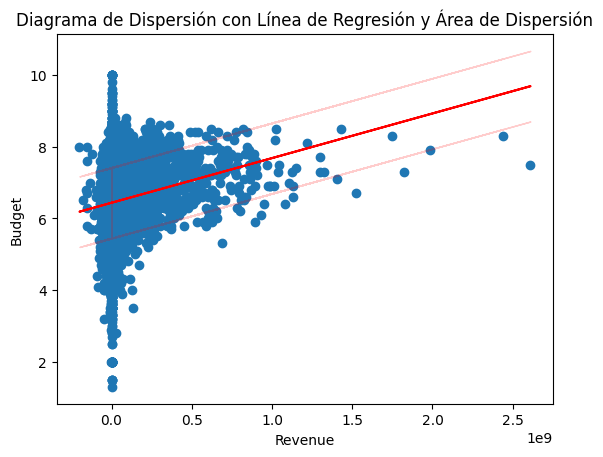

In [ ]:
sucess_vs_rating = dataframe[['voteAvg', 'revenue', 'budget']]
sucess_vs_rating = sucess_vs_rating.dropna()
sucess_vs_rating['success'] = sucess_vs_rating['revenue'] - sucess_vs_rating['budget']

# Calcular la correlación
sucess_corr_rating = sucess_vs_rating.corr()
print(sucess_corr_rating)

# Imprimir el valor específico de correlación para los ingresos
print("El valor específico de correlación para los ingresos es:", sucess_corr_rating.loc['voteAvg', 'success'])



# Crear un diagrama de dispersión con línea de regresión y área sombreada
plt.scatter(sucess_vs_rating['success'], sucess_vs_rating['voteAvg'])

# Ajustar una línea de regresión lineal
m, b = np.polyfit(sucess_vs_rating['success'], sucess_vs_rating['voteAvg'], 1)

# Trazar la línea de regresión
plt.plot(sucess_vs_rating['success'], m * sucess_vs_rating['success'] + b, color='red')

# Calcular y trazar el área sombreada alrededor de la línea de regresión
plt.fill_between(sucess_vs_rating['success'], m * sucess_vs_rating['success'] + b - np.std(sucess_vs_rating['voteAvg']),
                 m * sucess_vs_rating['success'] + b + np.std(sucess_vs_rating['voteAvg']), color='red', alpha=0.2)

# Etiquetas y título
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.title('Diagrama de Dispersión con Línea de Regresión y Área de Dispersión')

# Mostrar el gráfico
plt.show()

4.15. ¿A qué género principal pertenecen las películas más largas?

Para esta pregunta se decidió realizar el promedio de la duración de las películas por su género principal, donde la que obtuvo un mayor promedio de tiempo de duración es el género de historia con un promedio de 122.71 minutos de duración, seguidas por los géneros de guerra, wéstern, drama y crimen en el respectivo orden. En la tabla y gráfica a continuación se puede visualizar mejor estos resultados:

+----+------------------+--------------------+
|    | Genero Principal |      runtime       |
+----+------------------+--------------------+
| 0  |     History      | 122.71428571428571 |
| 1  |       War        |      120.6375      |
| 2  |     Western      | 116.65573770491804 |
| 3  |      Drama       | 111.59955629506378 |
| 4  |      Crime       | 111.46808510638297 |
| 5  |    Adventure     | 107.52767527675277 |
| 6  |      Music       | 104.65306122448979 |
| 7  |      Action      | 104.6133069828722  |
| 8  | Science Fiction  | 103.00983606557377 |
| 9  |     Romance      | 102.34267912772586 |
| 10 |     Thriller     | 101.8119349005425  |
| 11 |     Mystery      |      101.125       |
| 12 |     Fantasy      | 100.61825726141079 |
| 13 |      Comedy      | 97.80052666227782  |
| 14 |      Horror      | 93.18091009988902  |
| 15 |   Documentary    | 88.23938223938224  |
| 16 |      Family      | 84.75133689839572  |
| 17 |     TV Movie     |        80.5        |
| 18 |    Ani

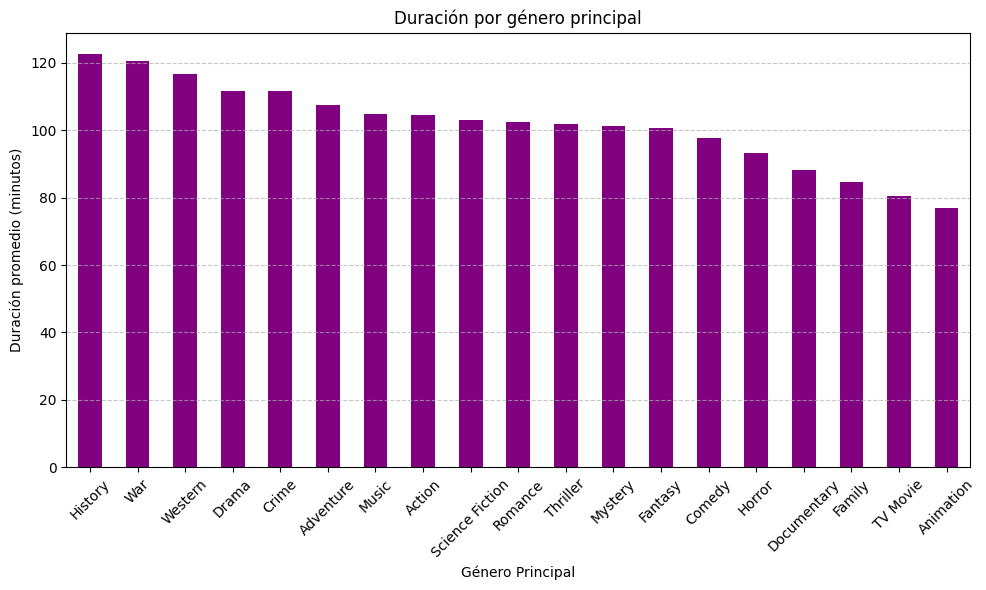

In [ ]:
#4.15
dataframe['Genero Principal'] = dataframe['genres'].str.split('|').str[0]

duracionPelicula = dataframe.groupby('Genero Principal')['runtime'].mean()

generoMasLargo = duracionPelicula.idxmax()
maxLargo = duracionPelicula.max()

duracion = pd.DataFrame(duracionPelicula)

duracionOrdenada = duracion.sort_values(by='runtime', ascending=False)
duracionOrdenada2 = duracionOrdenada.reset_index() 
print(tabulate(duracionOrdenada2, headers='keys', tablefmt='pretty'))
print(f"\nEl género con mayor duracion es {generoMasLargo} con {maxLargo} minutos.")

plt.figure(figsize=(10, 6))
duracionPelicula.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Duración por género principal')
plt.xlabel('Género Principal')
plt.ylabel('Duración promedio (minutos)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

5.1. ¿Cuál es el género menos rentable?

Para identificar el género menos rentable se realizó una sumatoria de las ganancias por cada género principal de las películas. En este caso se hizo la resta de *ingresos* menos *presupuesto* para así obtener las ganancias, y de esta manera, sumar todas estas en base a su género. De esta manera, podemos ver que el género principal de películas que menos ganancias tuvo fue el género de *TV Movie* con una pérdida de -$27000000.00. Le siguen los generos *Documentary*, *Western* y *History* aunque cabe destacar, que estos generos ya reportan ganancias.

+---+------------------+--------------+
|   | Genero Principal |   Ganancia   |
+---+------------------+--------------+
| 0 |     TV Movie     | -27000000.0  |
| 1 |   Documentary    | 285808109.0  |
| 2 |     Western      | 881251942.0  |
| 3 |     History      | 1061261377.0 |
| 4 |      Music       | 2598437717.0 |
+---+------------------+--------------+

El género con menores ganancias es TV Movie con -27000000.0 entrando ya entrando en el sector de pérdidas.


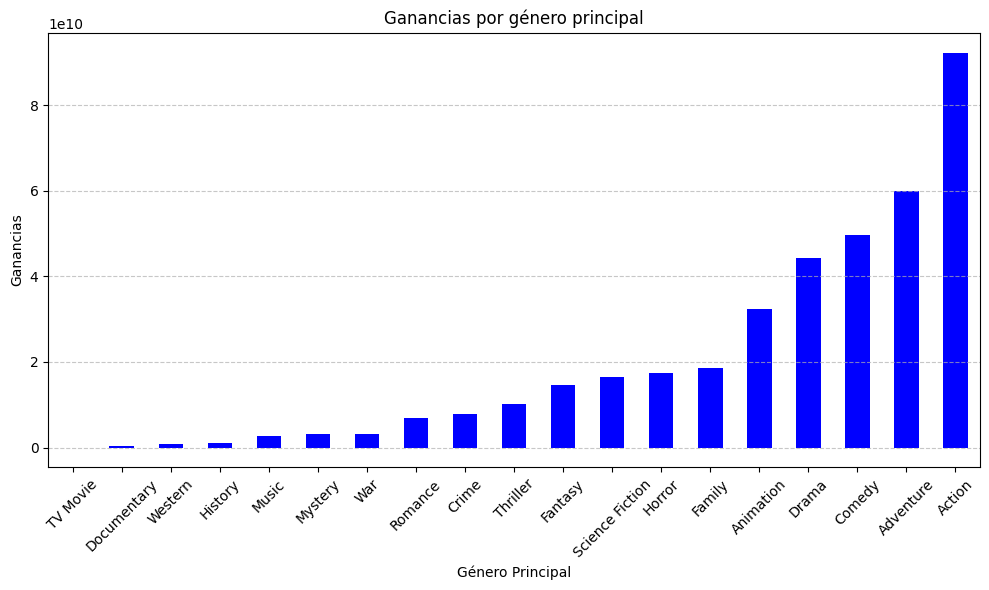

In [96]:
#5.1
import matplotlib.pyplot as plt
from tabulate import tabulate

dataframe["Ganancia"] = dataframe["revenue"] - dataframe["budget"]
dataframe["Genero Principal"] = dataframe["genres"].str.split("|").str[0]


gananciasGenero = dataframe.groupby("Genero Principal")["Ganancia"].sum()

generoMenosGanancias = gananciasGenero.idxmin()
minGanancias = gananciasGenero.min()

ganancias = pd.DataFrame(gananciasGenero)

gananciasOrdenadas = ganancias.sort_values(by="Ganancia", ascending=True).head(5)
gananciasOrdenadas2 = gananciasOrdenadas.reset_index() 
print(tabulate(gananciasOrdenadas2, headers="keys", tablefmt="pretty"))

print(f"\nEl género con menores ganancias es {generoMenosGanancias} con {minGanancias} entrando ya entrando en el sector de pérdidas.")

plt.figure(figsize=(10, 6))
gananciasGenero.sort_values(ascending=True).plot(kind="bar", color="blue")
plt.title("Ganancias por género principal")
plt.xlabel("Género Principal")
plt.ylabel("Ganancias")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

5.2. ¿Tienen más ingresos las películas cortas?

Para determinar si las películas de duracióon corta tienen más cortas, se estableció un umbral de duración mínimo para clasificar las películas con duración corta de las de duración larga. El umbral se estableció en 120 min. Luego, se calculó el promedio para cada grupo y se representó de manera visual los resultados obtenidos. De estos resultados se puede indicar que contrario a lo que plantea la pregunta, las películas con mayor duración (largas) son las que presentan mayores ingresos en promedio con un aproximado de $142052614.23 en comparación a las películas de duración corta con un ingreso promedio de $38828550.56 

Ingresos promedio de películas cortas: 38828550.55595886
Ingresos promedio de películas largas: 142052614.23227665


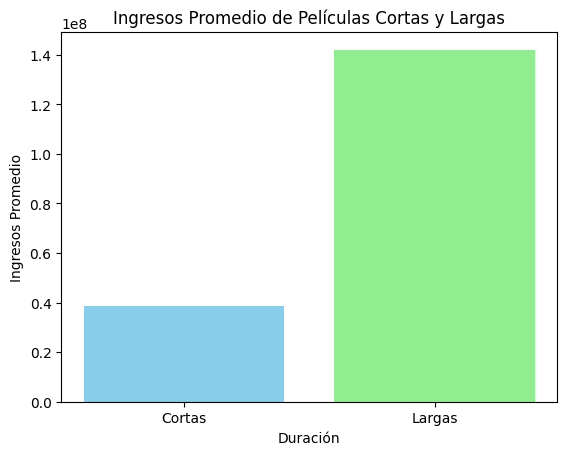

In [94]:

dataframe["runtime"] = pd.to_numeric(dataframe["runtime"], errors="coerce")

#Umbral en minutos
umbralCortas = 120

#Clasificación
peliculasCortas = dataframe[dataframe["runtime"] < umbralCortas]
peliculasLargas = dataframe[dataframe["runtime"] >= umbralCortas]

# Calcula los ingresos promedio para cada grupo
ingresosPromedioCortas = peliculasCortas["revenue"].mean()
ingresosPromedioLargas = peliculasLargas["revenue"].mean()

print("Ingresos promedio de películas cortas:", ingresosPromedioCortas)
print("Ingresos promedio de películas largas:", ingresosPromedioLargas)

plt.bar(["Cortas", "Largas"], [ingresosPromedioCortas, ingresosPromedioLargas], color=["skyblue", "lightgreen"])
plt.title("Ingresos Promedio de Películas Cortas y Largas")
plt.xlabel("Duración")
plt.ylabel("Ingresos Promedio")
plt.show()


5.3. ¿A qué género principal pertenecen las películas más cortas?

Para determinar a qué genero principial pertenecen las películas más cortas, se decidió realizar el promedio de la duración de las películas por su género principal, donde la que obtuvo un menor promedio de tiempo de duración es el género de *Animation* con un promedio de 76.83 minutos de duración, seguidas por los géneros de TV Movie, Family, Documentary y Horror en el respectivo orden. A manera proveer una representación visual de los resultados, a continuación se presentan una tabla y una gráfica:

+---+------------------+--------------------+
|   | Genero Principal |      runtime       |
+---+------------------+--------------------+
| 0 |    Animation     | 76.83230579531443  |
| 1 |     TV Movie     |        80.5        |
| 2 |      Family      | 84.75133689839572  |
| 3 |   Documentary    | 88.23938223938224  |
| 4 |      Horror      | 93.18091009988902  |
| 5 |      Comedy      | 97.80052666227782  |
| 6 |     Fantasy      | 100.61825726141079 |
+---+------------------+--------------------+

El género con menor duracion es Animation con 76.83230579531443 minutos.


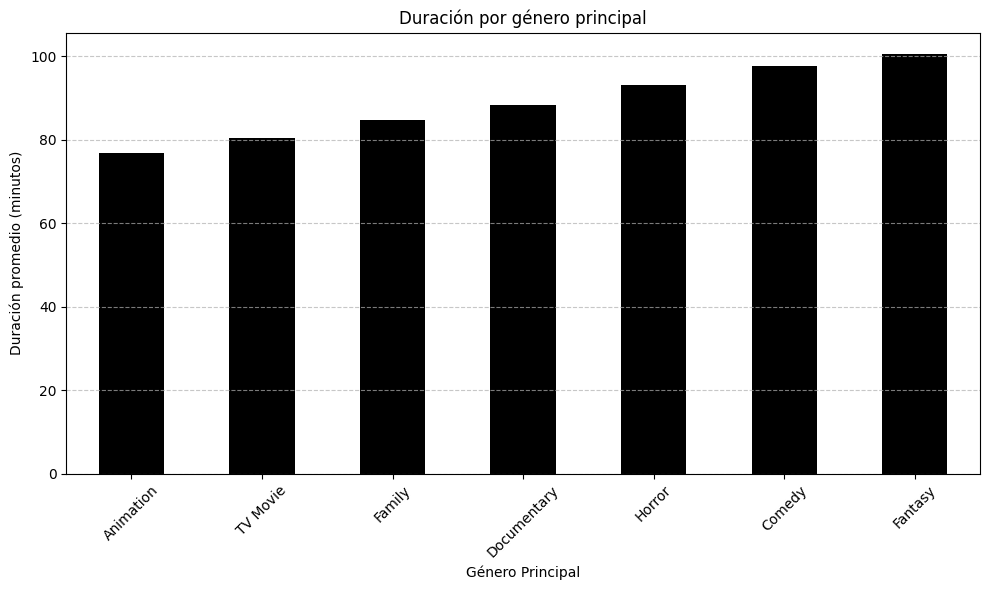

In [95]:

#5.3
dataframe["Genero Principal"] = dataframe["genres"].str.split("|").str[0]

duracionPelicula = dataframe.groupby("Genero Principal")["runtime"].mean()

generoMinLargo = duracionPelicula.idxmin()
minLargo = duracionPelicula.min()

duracion = pd.DataFrame(duracionPelicula)

duracionOrdenada = duracion.sort_values(by="runtime", ascending=True).head(7)
duracionOrdenada2 = duracionOrdenada.reset_index() 
print(tabulate(duracionOrdenada2, headers="keys", tablefmt="pretty"))
print(f"\nEl género con menor duracion es {generoMinLargo} con {minLargo} minutos.")

plt.figure(figsize=(10, 6))
duracionPelicula.sort_values(ascending=True).head(7).plot(kind="bar", color="black")
plt.title("Duración por género principal")
plt.xlabel("Género Principal")
plt.ylabel("Duración promedio (minutos)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
